## 단순 선형회귀

In [2]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

### 1. 아버지와 아들의 키 - Galton

In [12]:
df = pd.read_table('http://www.randomservices.org/random/data/Galton.txt')

In [13]:
df.head()

,Family,Father,Mother,Gender,Height,Kids
0,1,78.5,67.0,M,73.2,4
1,1,78.5,67.0,F,69.2,4
2,1,78.5,67.0,F,69.0,4
3,1,78.5,67.0,F,69.0,4
4,2,75.5,66.5,M,73.5,4


- 아버지와 아들의 키만 발췌하고 단위를 cm으로 변환

In [7]:
df = df[df.Gender == 'M']
height = df[['Father','Height']].rename(columns={'Height':'Son'})
height.head()

,Father,Son
0,78.5,73.2
4,75.5,73.5
5,75.5,72.5
8,75.0,71.0
10,75.0,70.5


In [10]:
# 스케일링 진행
height = height * 2.54 
height.head()

,Father,Son
0,199.39,185.928
4,191.77,186.690
5,191.77,184.150
8,190.50,180.340
10,190.50,179.070


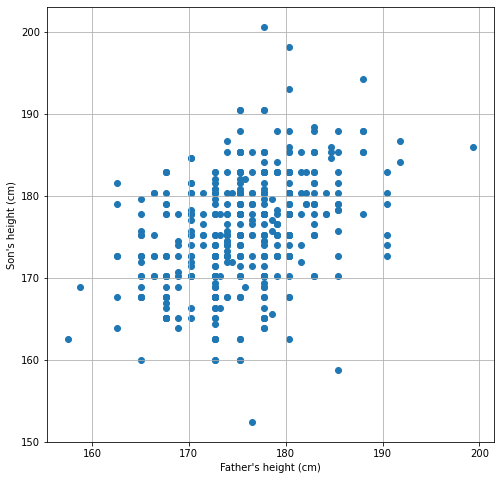

In [11]:
plt.figure(figsize = (8,8))
plt.scatter(height.Father, height.Son)
plt.xlabel("Father's height (cm)")
plt.ylabel("Son's height (cm)")
plt.grid()
plt.show()

- Numpy 최소자승법을 이용해서 회귀선 구하기

In [14]:
A = np.vstack( [height.Father, np.ones(len(height.Father)) ]).T
A.shape

(465, 2)

In [18]:
# A는 어떻게 생긴걸까?
mydf = pd.DataFrame(A)
mydf

,0,1
0,199.39,1.0
1,191.77,1.0
2,191.77,1.0
3,190.50,1.0
4,190.50,1.0
...,...,...
460,173.99,1.0
461,173.99,1.0
462,173.99,1.0
463,173.99,1.0


In [15]:
reg = np.linalg.lstsq(A, height.Son, rcond=None)
reg

(array([ 0.44774792, 97.17763701]),
 array([17556.59951549]),
 2,
 array([3.79064358e+03, 7.15847817e-01]))

In [19]:
# 기울기와 절편
m,c = reg[0]

In [20]:
# 잔차 제곱의 합(Residual Sum of Square)
rff = reg[1]

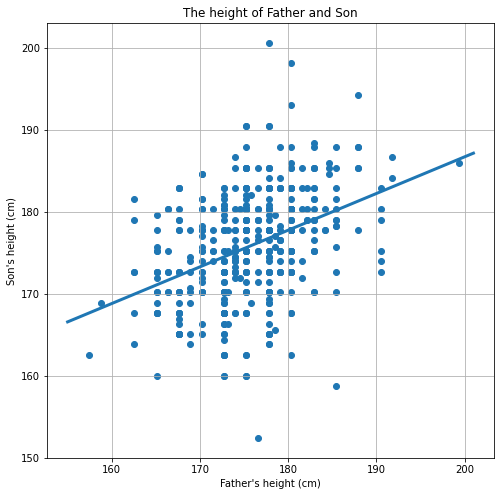

In [22]:
plt.figure(figsize = (8,8))
plt.scatter(height.Father, height.Son)
plt.plot([155,201],[m*155+c, m*201+c], lw=3)   # ([x1,x2], [m*x1+c, m*x2+c])
plt.title('The height of Father and Son')
plt.xlabel("Father's height (cm)")
plt.ylabel("Son's height (cm)")
plt.grid()
plt.show()

- Scikit-Learn

In [23]:
from sklearn.linear_model import LinearRegression

In [24]:
height.Father.values.shape 

(465,)

In [27]:
# 2차원으로 만들기
X = height.Father.values.reshape(-1,1)
X.shape

(465, 1)

In [28]:
y = height.Son.values
y.shape

(465,)

In [29]:
lr = LinearRegression()
lr.fit(X, y)

LinearRegression()

In [31]:
weight, bias = lr.coef_, lr.intercept_
rss = lr._residues

weight[0], bias, rss

(0.44774791760302535, 97.17763700739349, 17556.59951549399)

In [33]:
weight

array([0.44774792])

In [32]:
# R squared
lr.score(X, y)

0.1531292747830697